In [2]:
# importamos las librerías que necesitamos
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest
from itertools import combinations

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [4]:
# leer csv1 limpio
df1 = pd.read_csv("Customer Flight Activity_limpio.csv")
df1.sample()

,Unnamed: 0,numero_cliente,ano,mes,vuelos_reservados,vuelos_con_acompanantes,total_vuelos,distancia,puntos_acumulados,puntos_canjeados,costo_en_dolares_de_los_puntos_canjeados
208786,208786,420464,2018,1,0,0,0,0,0.0,0,0


In [5]:
# leer csv2 limpio
df2 = pd.read_csv("Customer Loyalty History_limpio.csv")
df2.sample()

,numero_cliente,provincia,ciudad,codigo_postal,genero,educacion,salario,estado_civil,tarjeta_lealtad,valoracion_cliente,tipo_inscripcion,ano_inscripcion,mes_inscripcion,ano_cancelacion,mes_cancelacion,estado_cliente,columna_float
10079,824315,Ontario,London,M5B 3E4,Female,College,73455.0,Single,Star,2292.79,Standard,2015,2,999,99,Activo,NaN


In [6]:
# leer csv unido
df = pd.read_csv("datos_limpio_unidos.csv")
df.sample()

,Unnamed: 0,numero_cliente,ano,mes,vuelos_reservados,vuelos_con_acompanantes,total_vuelos,distancia,puntos_acumulados,puntos_canjeados,costo_en_dolares_de_los_puntos_canjeados,provincia,ciudad,codigo_postal,genero,educacion,salario,estado_civil,tarjeta_lealtad,valoracion_cliente,tipo_inscripcion,ano_inscripcion,mes_inscripcion,ano_cancelacion,mes_cancelacion,estado_cliente,columna_float
237708,237708,796692,2018,4,13,3,16,2368,254.88,0,0,Nova Scotia,Halifax,B3C 2M8,Female,Bachelor,81592.0,Married,Star,5292.2,Standard,2012,8,999,99,Activo,NaN


# Fase 2: Visualización
## Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [7]:

# generamos columna fecha pasamos el año y mes 
df1['ano'] = df1['ano']
df1['mes'] = df1['mes']
# le damos valor 1 a todos los dias
df1['dia'] = 1

# Crear la columna de fecha combinando año, mes y día
df1['fecha_vuelo'] = pd.to_datetime(df1[['ano', 'mes', 'dia']].rename(columns={'ano': 'year', 'mes': 'month', 'dia': 'day'}))

# Verifica el resultado
print(df1[['ano', 'mes', 'dia', 'fecha_vuelo']].head())

    ano  mes  dia fecha_vuelo
0  2017    1    1  2017-01-01
1  2017    1    1  2017-01-01
2  2017    1    1  2017-01-01
3  2017    1    1  2017-01-01
4  2017    1    1  2017-01-01


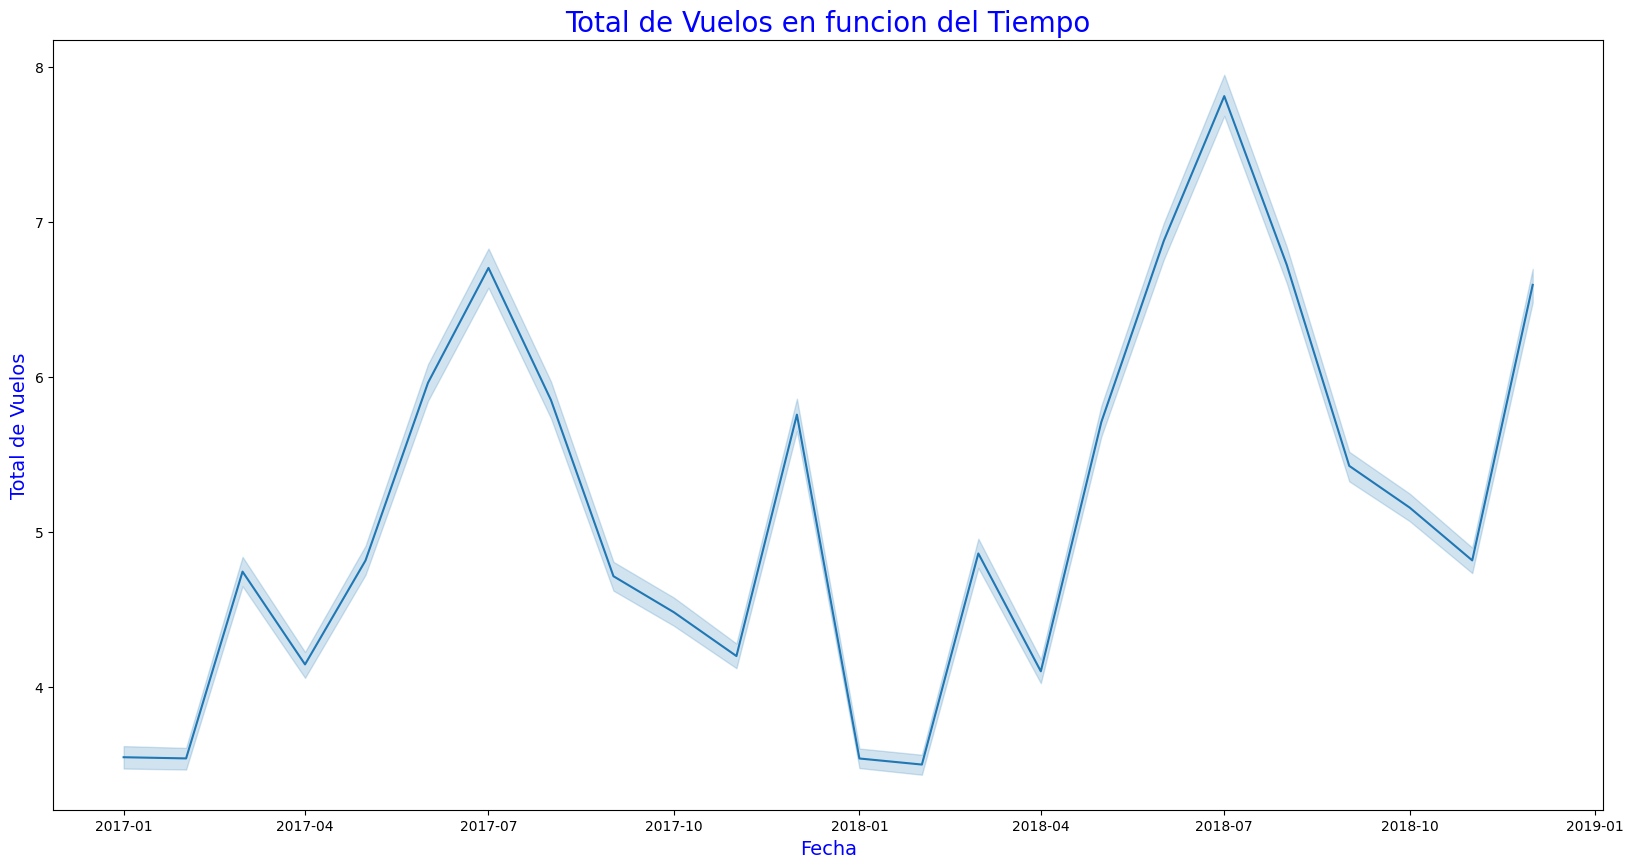

In [8]:
# tamano grafica 
plt.figure(figsize=(20,10))
# grafico de linea
sns.lineplot(data=df1, x="fecha_vuelo", y="total_vuelos");

# Añadir un título al gráfico
plt.title('Total de Vuelos en funcion del Tiempo',color = "blue", fontsize=20)
# Nombrar el eje x
plt.xlabel('Fecha', fontsize=14, color='blue')

# Nombrar el eje y
plt.ylabel('Total de Vuelos', fontsize=14, color='blue');

En esta gráfica vemos que los meses donde hay mas reservas en es sobre todo en verano y después en navidad, teniendo el pico mas alto (en ambos años) en julio. Vamos a ver como ha evolucionado esto de un año a otro en la siguiente gráfica

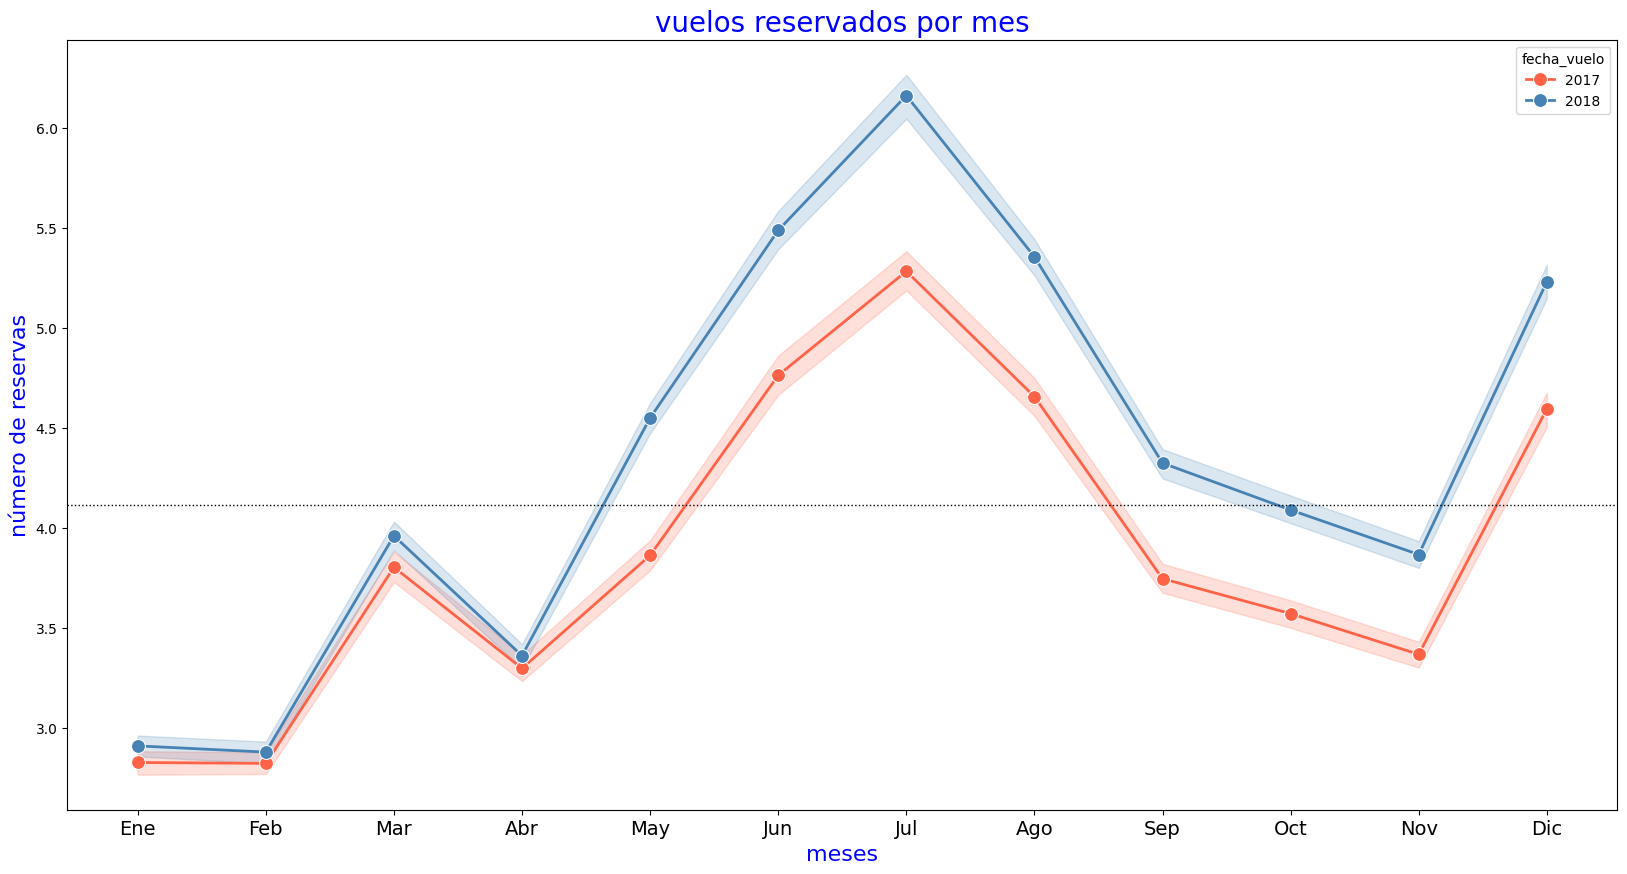

In [7]:

# hagamos un subplot con el vuelos_reservados y en función del mes
plt.subplots( figsize = (20, 10))

# Crear un gráfico de líneas que muestra la evolución de los vuelos reservados por mes, con una distinción por año
sns.lineplot(x=df1["fecha_vuelo"].dt.month, # por mese
             y=df1["vuelos_reservados"],
            hue = df1["fecha_vuelo"].dt.year, # variable ano
            palette = ["#FF6347", "#4682B4"], # color de las lineas            
            marker = "o", # para especificar que marcador queremos
            markersize = 10, # para establecer el tamaño del marcador
            linewidth = 2 # para cambiar el grosor de la linea
            )

# titulo
plt.title("vuelos reservados por mes",color = "blue", fontsize= 20)


# para cambiar las etiquetas del eje x y sus colores y tamaños
plt.xticks(np.sort(df1["fecha_vuelo"].dt.month.unique()),  # valores originales del eje x
                ['Ene', "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"], 
                color = "black", 
                fontsize = 14); # valores nuevos que queremos en el eje x

# para cambiar el nombre del eje x
plt.xlabel('meses', color = "blue",  fontsize = 16)

# para cambiar el nobre el eje y
plt.ylabel('número de reservas', color = "blue", fontsize = 16)

# para añadir una linea fija en el plot en funcion de la media
media = df1["vuelos_reservados"].mean()
plt.axhline(media, color='black', linewidth=1, linestyle='dotted');

Suben las reservas en verano y navidad pero tambien vemos que el numero de reservas ha sido mayor en el 2018

# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

Usaremos un Regplot ya que queremos explorar la relación entre dos variables numéricas y al mismo tiempo, ver cómo se ajusta una línea de regresión lineal a esos datos. Es útil para identificar la dirección y la fuerza de la relación entre las variables, y para evaluar si existe una correlación lineal entre ellas.

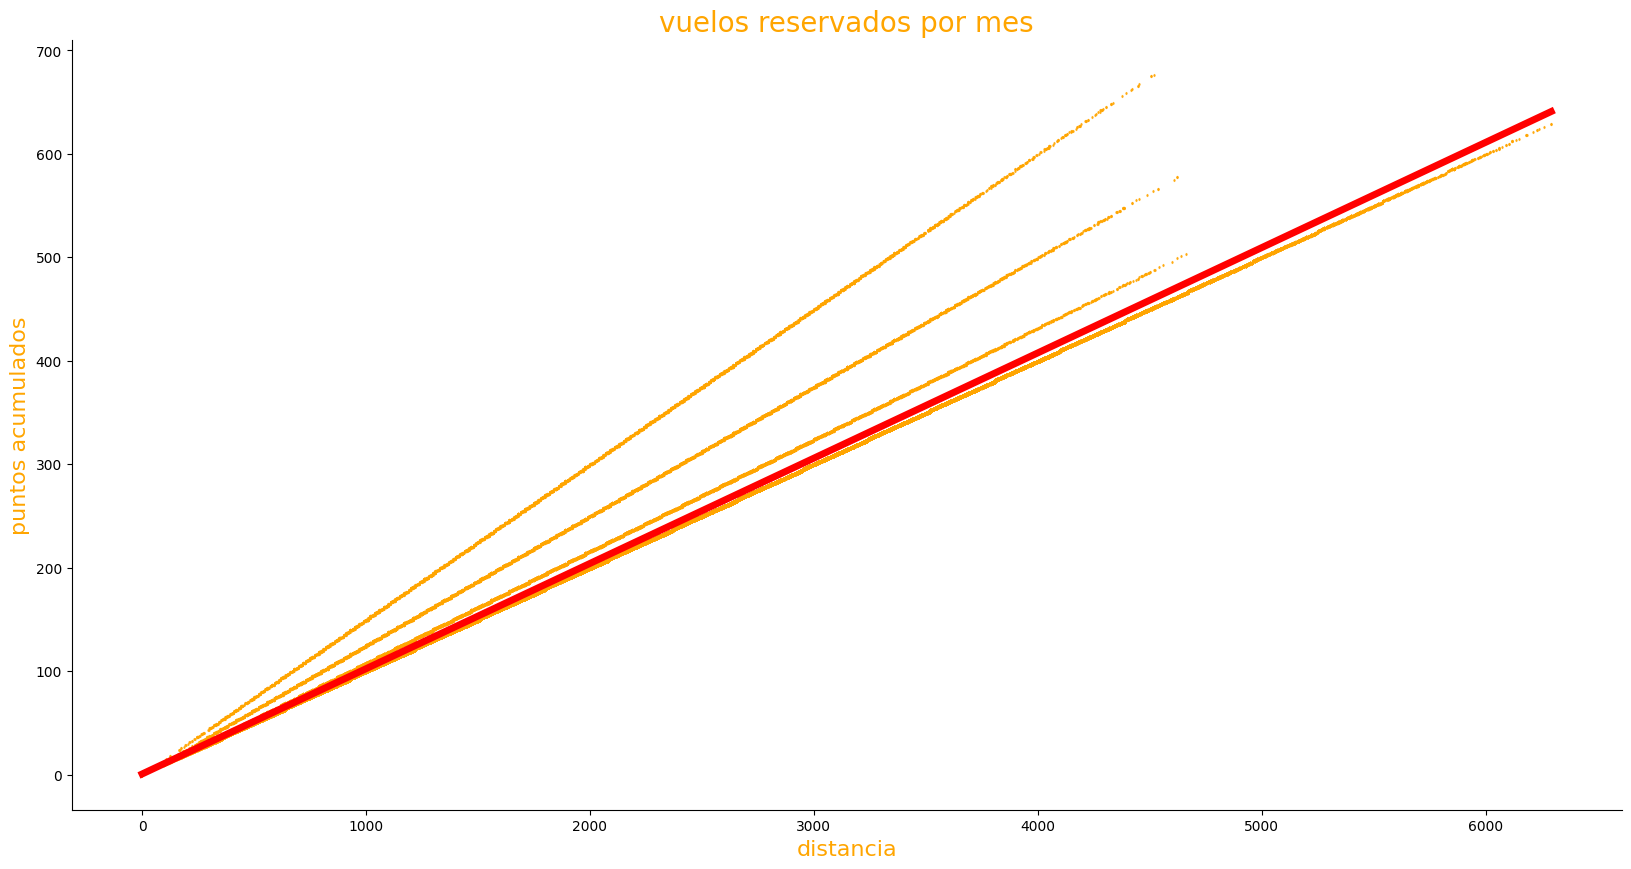

In [11]:
# tamaño de la grafica
plt.figure(figsize=(20, 10))
# Crear el gráfico de dispersión con una línea de regresión
sns.regplot(x = "distancia", 
            y = "puntos_acumulados", 
            data = df1, 
            marker = "d", # Especificar el marcador
            line_kws = {"color": "red", "linewidth": 5}, # cambiamos el color y el grosor de la linea de tendencia
            scatter_kws = {"color": "orange", "s": 1} # cambiamos el color y el tamaño de los puntos del scaterplot
            );
# titulo
plt.title("vuelos reservados por mes",color = "orange", fontsize= 20)

# para cambiar el nombre del eje x
plt.xlabel('distancia', color = "orange", fontsize = 16)

# para cambiar el nobre el eje y
plt.ylabel('puntos acumulados', color = "orange", fontsize = 16)

plt.gca().spines['right'].set_visible(False) # quitamos la línea de la derecha
plt.gca().spines["top"].set_visible(False) # quitamos la línea de arriba;

Observamos que la línea de regresión es ascendente, lo que nos indica una relación positiva. Es decir, a medida que una variable aumenta, la otra también tiende a aumentar.
Vemos 4 lineas de tendencia, esto puede influir el tipo de tarjeta que tiene el cliente por lo que vamos hacer analisis con el df unido para ver la influencia en función de la tarjeta de lealtad

In [9]:
df['tarjeta_lealtad'].unique()

array(['Aurora', 'Nova', 'Star'], dtype=object)

Text(0, 0.5, 'puntos acumulados')

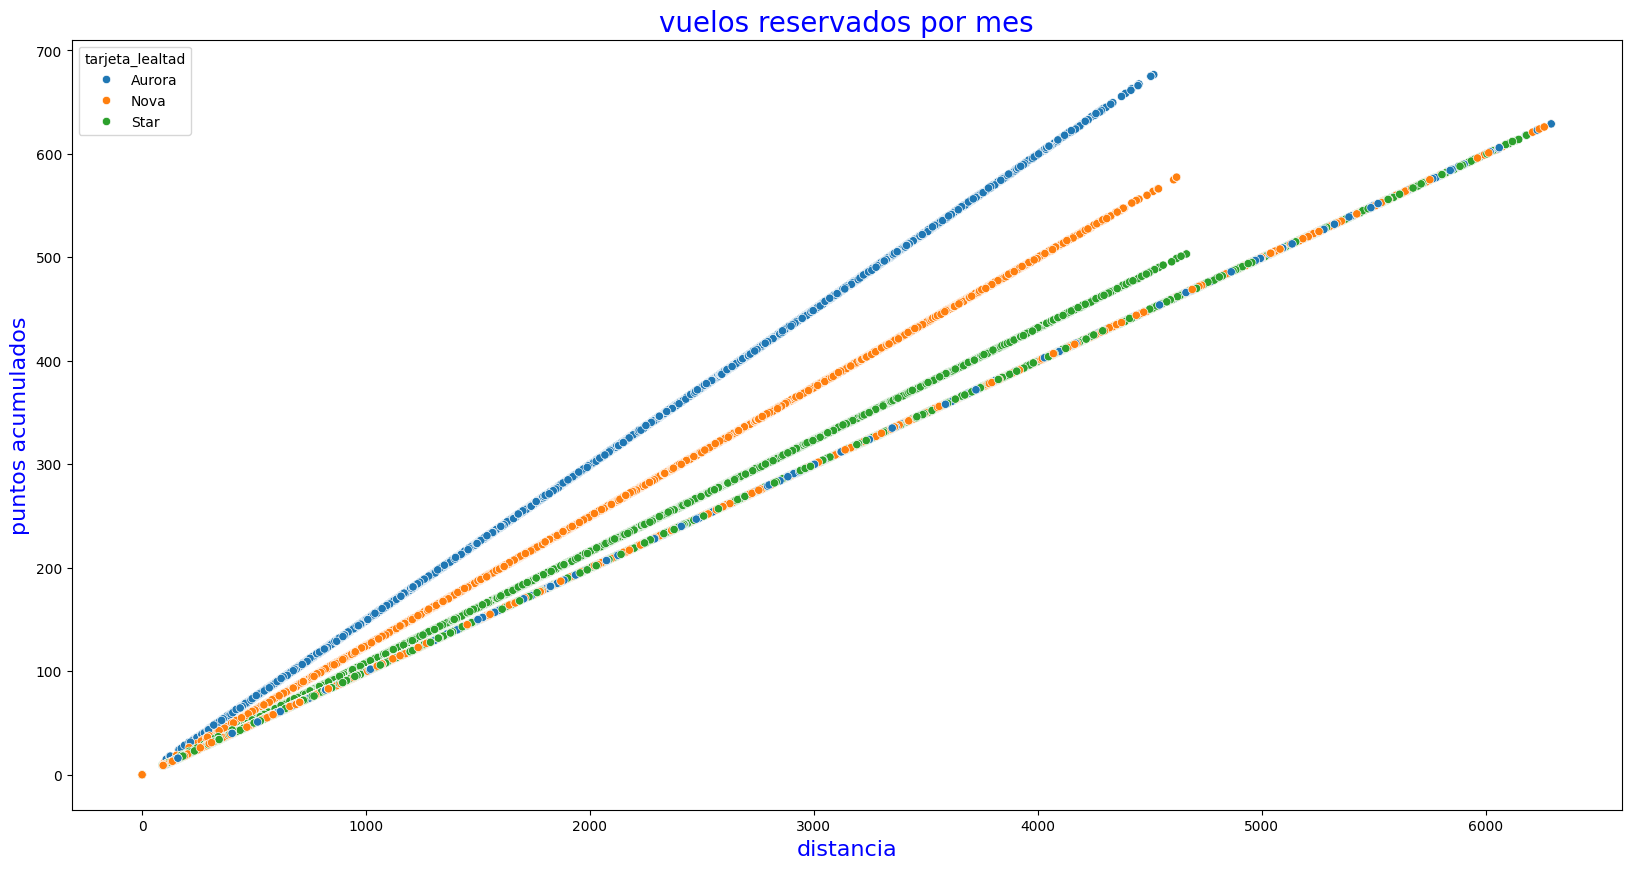

In [10]:
# tamaño de la grafica
plt.figure(figsize=(20, 10))

# Crear un gráfico de dispersión para visualizar la relación entre distancia y puntos acumulados
sns.scatterplot(x = "distancia", 
                y = "puntos_acumulados", 
                data = df,
                hue = "tarjeta_lealtad"); # 
# titulo
plt.title("vuelos reservados por mes",color = "blue", fontsize= 20)

# para cambiar el nombre del eje x
plt.xlabel('distancia', color = "blue", fontsize = 16)

# para cambiar el nobre el eje y
plt.ylabel('puntos acumulados', color = "blue", fontsize = 16)

Vemos que hay una relacion entre la distancia y los puntos acumulados, esto se ve afectado por el tipo de tarjeta del cliente. Cuanto mas alto es tu tarjeta de lealtad mas acumilas

Habria que ver con mas detalle el motivo por el cual hay una cuarta linea, probablemente corresponde a que el cliente no esta subscrito

# 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [11]:
df2["provincia"].value_counts()

provincia
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64

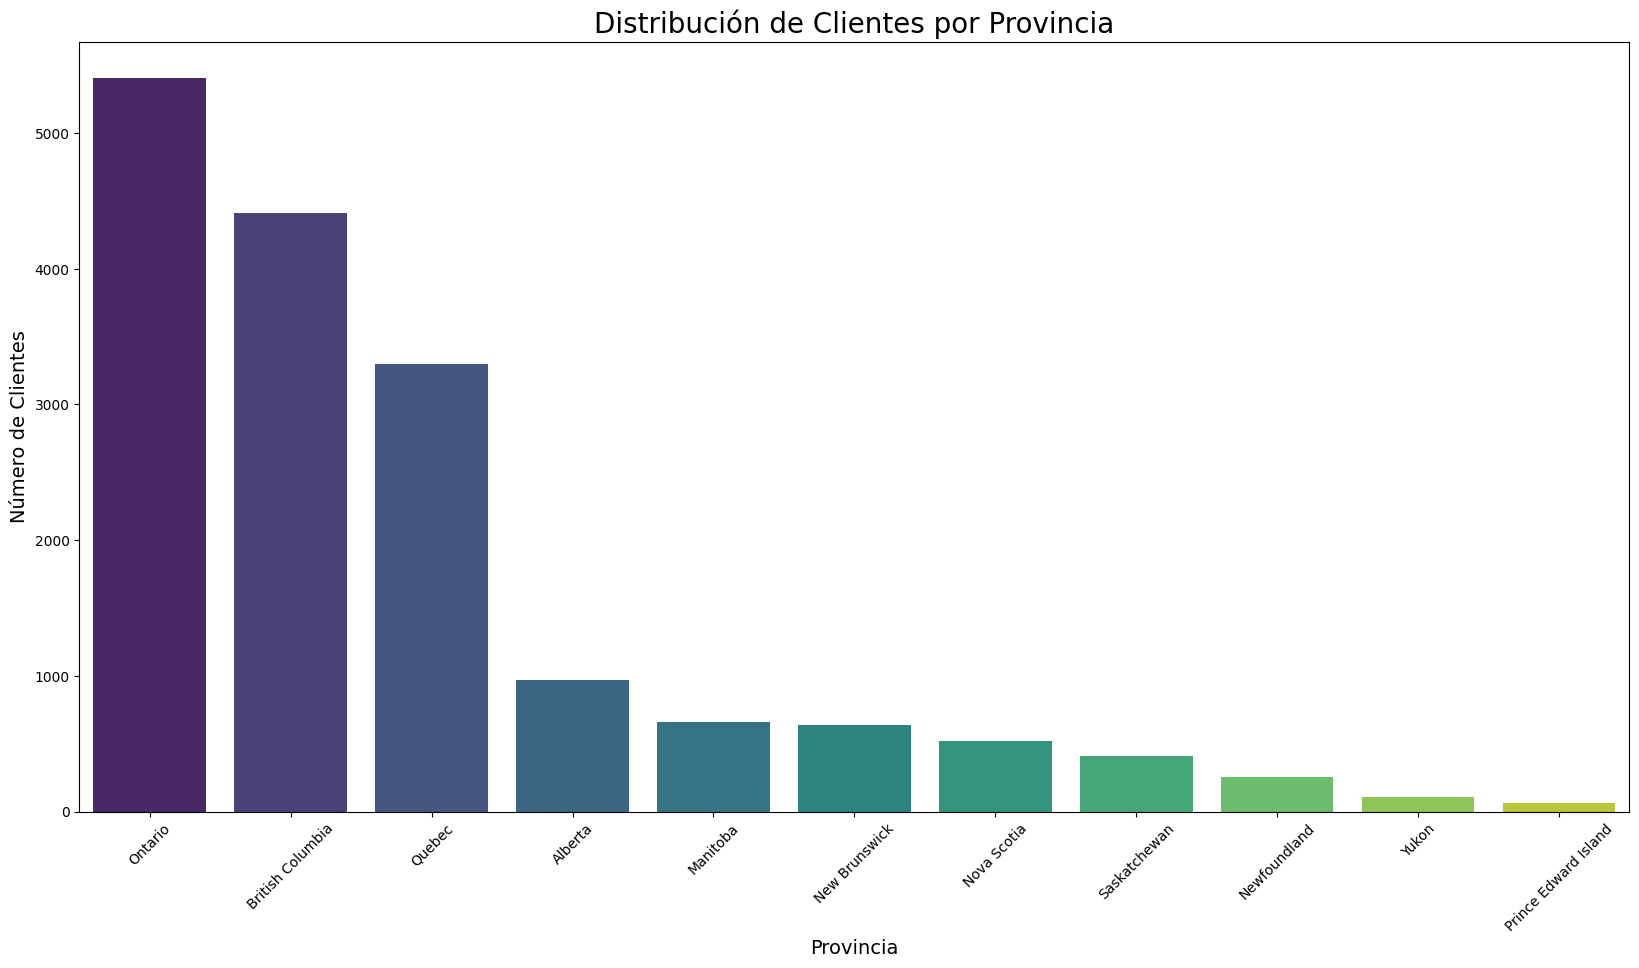

In [12]:
# Ajustar el tamaño de la gráfica
plt.figure(figsize=(20, 10))


# Crear un gráfico de barras con los conteos de clientes por provincia
sns.countplot(x = "provincia", 
              data = df2,
              palette= "viridis",
              order = df2['provincia'].value_counts().index)

# Añadir un título y nombres de los ejes a la gráfica
plt.title('Distribución de Clientes por Provincia', fontsize=20)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
# rotamos los nombres
plt.xticks(rotation=45);

Los gráficos de barras son la mejor opción para visualizar la distribución de los clientes porque lo visualizamos de manera clara. Todos nuestros clientes pertenecen a Canada por lo que la representación la hacemos sobre las provincias. Vemos que la distribución de los clientes no es nada uniforme. La provincia con mas clientes es Ontario, seguido por British Columbia y Quebec, los cuales abarcan gran parte del total de clientes, mientras qaue provincias como Yukon o Prince Edward Island no tienen apenas importancia- Esta desigualdad tan marcada puede deberse a varios factores como la densidad poblacional o el nivel de ingresos de cada provincia. Estos aspectos son interesantes estudiarlos para futuras estrategias de la empresa.

# 4.¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Doctor'),
  Text(1, 0, 'Master'),
  Text(2, 0, 'Bachelor'),
  Text(3, 0, 'College'),
  Text(4, 0, 'High School or Below')])

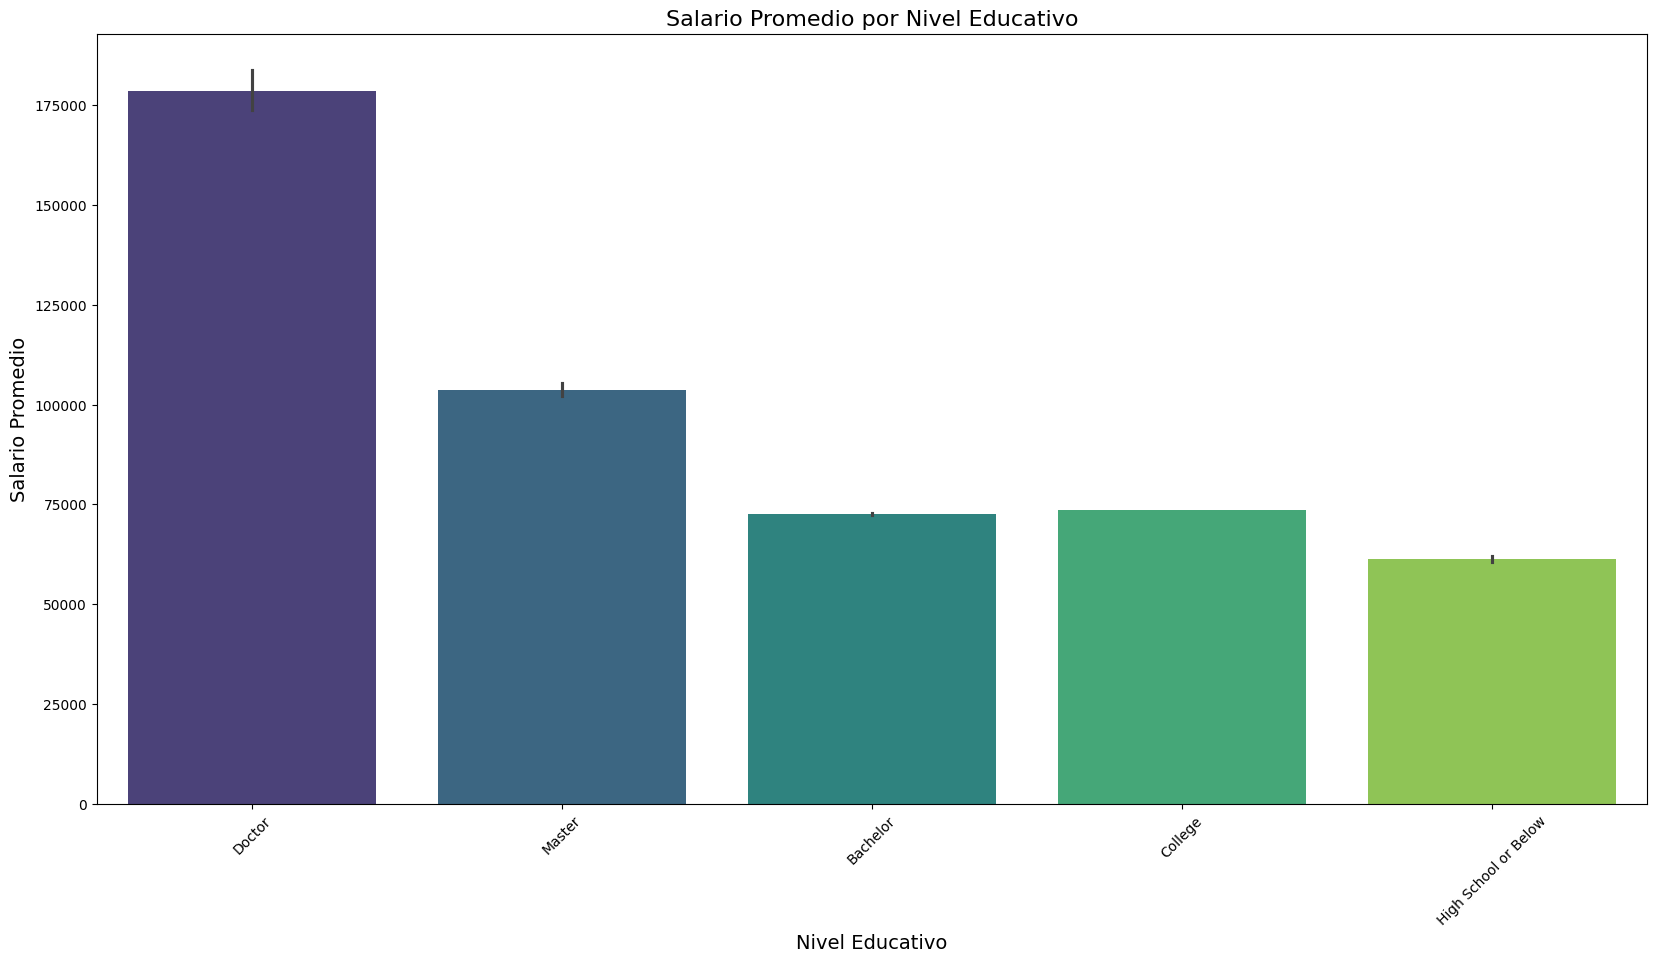

In [12]:
# Tamaño de la gráfica
plt.figure(figsize=(20, 10))
# Crear el gráfico de barras para visualizar el salario promedio por nivel educativo
sns.barplot(x = "educacion",
            y = "salario", 
            data = df2,
            palette= "viridis",
            order = ["Doctor","Master", "Bachelor", "College", "High School or Below"]) # Ordenamos

# Configurar los títulos y etiquetas
plt.title('Salario Promedio por Nivel Educativo', fontsize=16)
plt.xlabel('Nivel Educativo', fontsize=14)
plt.ylabel('Salario Promedio', fontsize=14)
plt.xticks(rotation=45)



Volvemos a usar un gráfico de barras para visualizar bien los resultados. Vemos que existe una fuerte relación entre el nivel educativo y el salario promedio, ya que los clientes con un nivel educativo alto tienen el salario más alto y mientras este nivel educativo va bajando, el salario tambien lo hace.
Vamos a hacer lo mismo con matplotlib  Si bien cuando hacemos un barplot con Seaborn no hace falta que hagamos ningún calculo previo, en el caso de Matplotlib si que lo tendremos que hacer. Por lo tanto, lo primero que haremos será calcular el salario promedio por nivel educativo , para lo que usaremos un groupby

In [13]:
# Calcula el salario promedio por nivel educativo y ordenamos
salario_promedio = df2.groupby('educacion')['salario'].mean().reset_index().sort_values(by='salario', ascending=False)

''

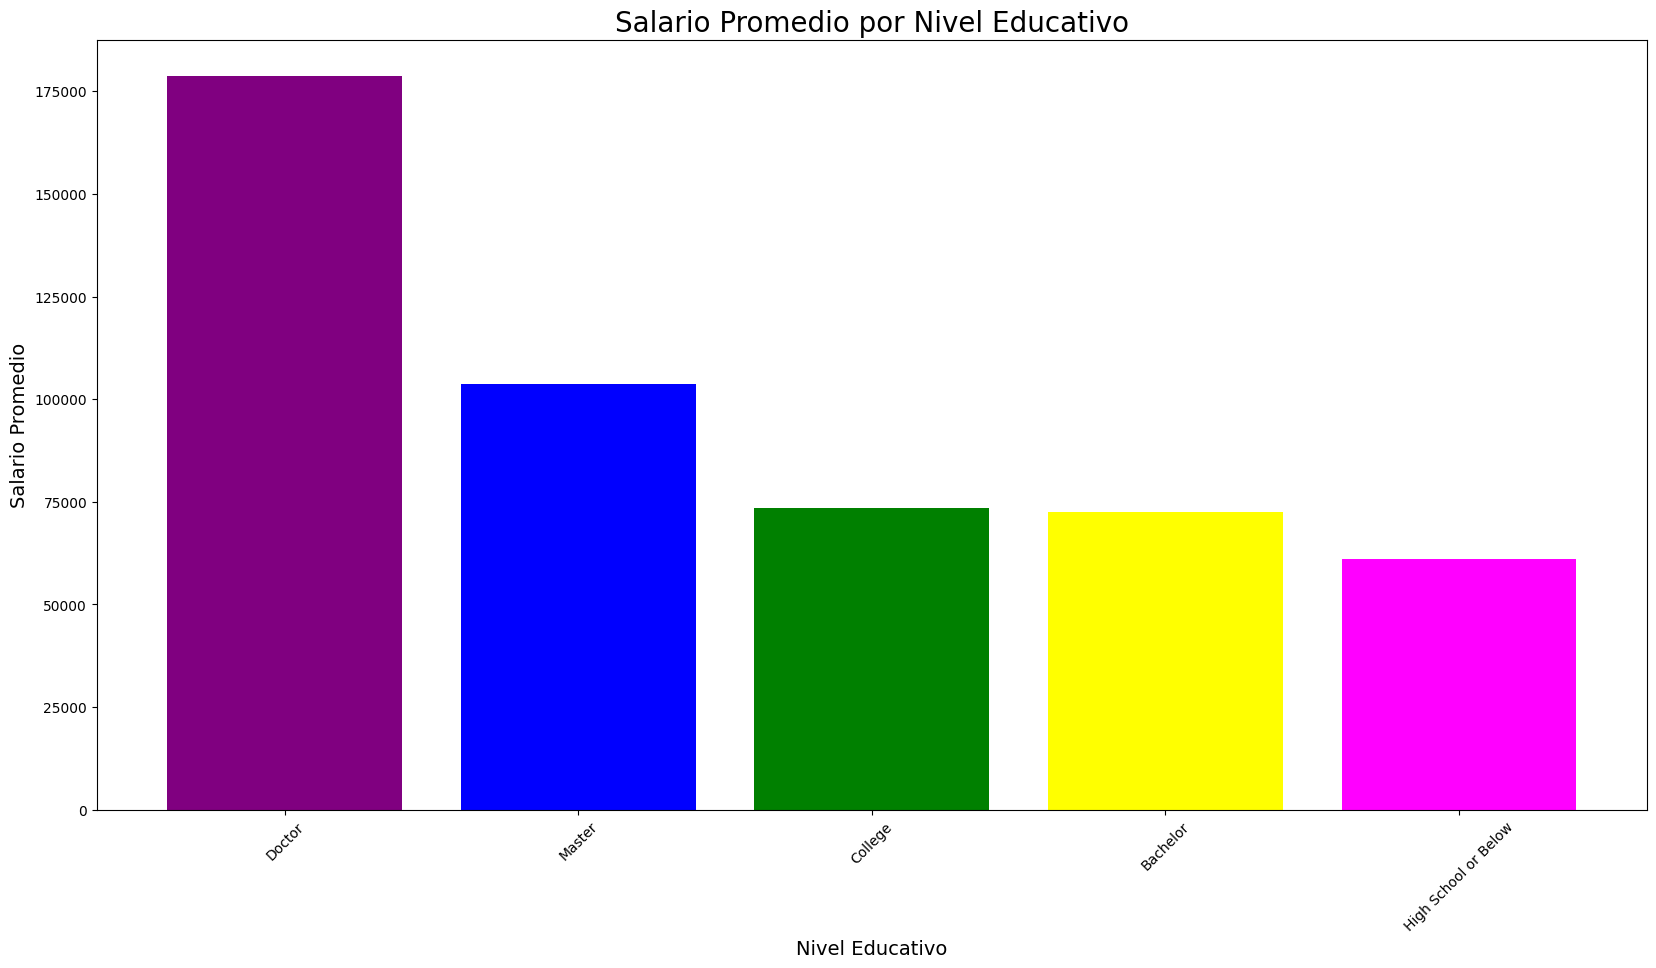

In [14]:
# Tamaño de la gráfica
plt.figure(figsize=(20, 10))
# creamos un barplot usando Matplotlib, el método 'plt.bar()' 
plt.bar(x = "educacion", 
        height=  "salario", 
        data = salario_promedio,
        color = ["purple", "blue", "green", "yellow", "magenta"])        
# Configurar los títulos y etiquetas
plt.title('Salario Promedio por Nivel Educativo', fontsize=20)
plt.xlabel('Nivel Educativo', fontsize=14)
plt.ylabel('Salario Promedio', fontsize=14)
plt.xticks(rotation=45)
;

In [18]:
media_salario = df2.groupby('educacion')['salario'].mean().round(2)
varianza_salario = df2.groupby('educacion')['salario'].std().round(2)

In [19]:
# Imprimimos los valores calculados
print("Salario promedio por nivel educativo:")
print(media_salario)
print("Desviación estándar del salario por nivel educativo:")
print(varianza_salario)

Salario promedio por nivel educativo:
educacion
Bachelor                 72577.25
College                  73455.00
Doctor                  178608.90
High School or Below     61199.16
Master                  103757.85
Name: salario, dtype: float64
Desviación estándar del salario por nivel educativo:
educacion
Bachelor                16667.02
College                     0.00
Doctor                  70466.19
High School or Below    12105.35
Master                  17527.94
Name: salario, dtype: float64


El salario más alto es el de la categoria Doctor que tambien es el que presenta una mayor varianza, lo que indica gran disparidad de los salarios con este nivel educativo, al contrario que Hight School or Below lo que indica unos salarios mas homogeneos

# 5.¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 

In [19]:
# leer csv2 limpio
df2 = pd.read_csv("Customer Loyalty History_limpio.csv")

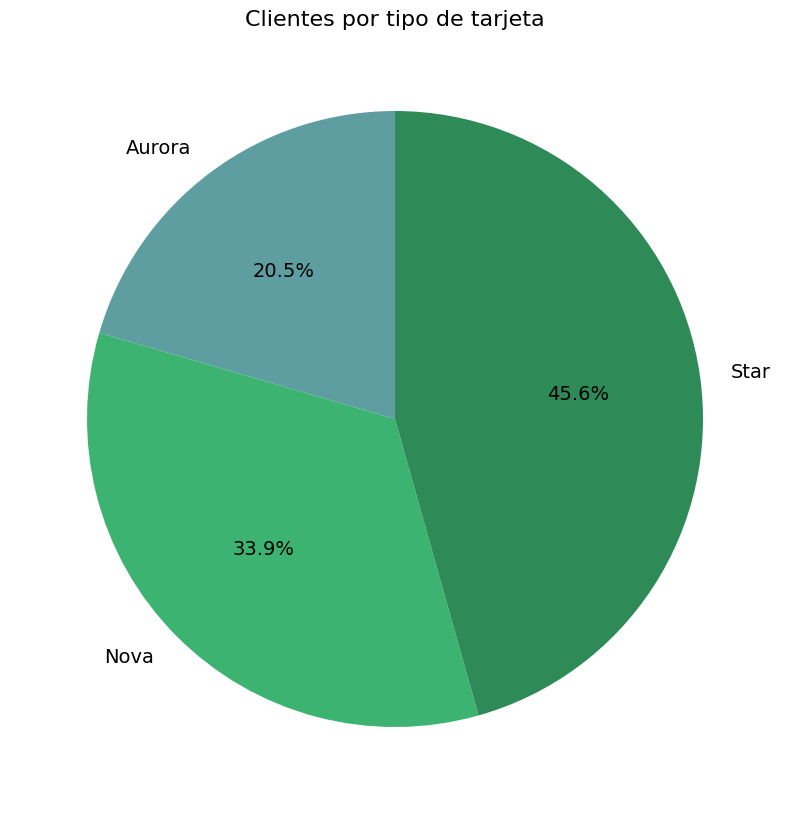

In [20]:
# Agrupamos por tipo de tarjeta
df_tarjeta2 = df2.groupby("tarjeta_lealtad")["numero_cliente"].count().reset_index()

plt.figure(figsize=(20, 10))
# lo primero que vamos a hacer es definir una lista para definir los colores que queremos para cada una de las categorías. 
# Esta lista debe tener tantos elementos como categorías tenemos en la columna de estudio (en este caso 7)
colores = ["cadetblue", "mediumseagreen", "seagreen"]

# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("numero_cliente", 
        labels= "tarjeta_lealtad",
        data = df_tarjeta2, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 14}, # Tamaño de la fuente para las etiquetas
        startangle=90);

# Configurar los títulos y etiquetas
plt.title('Clientes por tipo de tarjeta', fontsize=16);

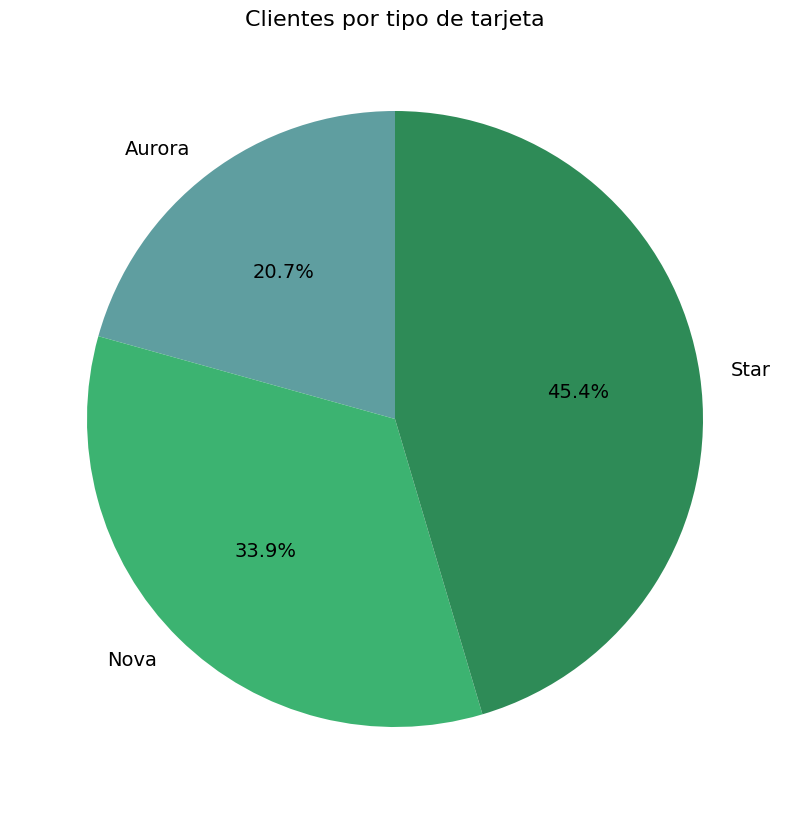

In [21]:
# Agrupamos por tipo de tarjeta
df_tarjeta = df.groupby("tarjeta_lealtad")["numero_cliente"].count().reset_index()

plt.figure(figsize=(20, 10))
# lo primero que vamos a hacer es definir una lista para definir los colores que queremos para cada una de las categorías. 
# Esta lista debe tener tantos elementos como categorías tenemos en la columna de estudio (en este caso 7)
colores = ["cadetblue", "mediumseagreen", "seagreen"]

# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("numero_cliente", 
        labels= "tarjeta_lealtad",
        data = df_tarjeta, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 14}, # Tamaño de la fuente para las etiquetas
        startangle=90);

# Configurar los títulos y etiquetas
plt.title('Clientes por tipo de tarjeta', fontsize=16);

La tarjeta mas demandada por los clientes es la STAR que acumula casi la mitad de los clientes, seguida por NOVA y la menos utilizada es la ARORA. Esto nos indica que la estrategia de fidelización mas atractiva para los clientes es mas exitosa con la tarjeta STAR ya que seguframente ofrezca mejores beneficios

# 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

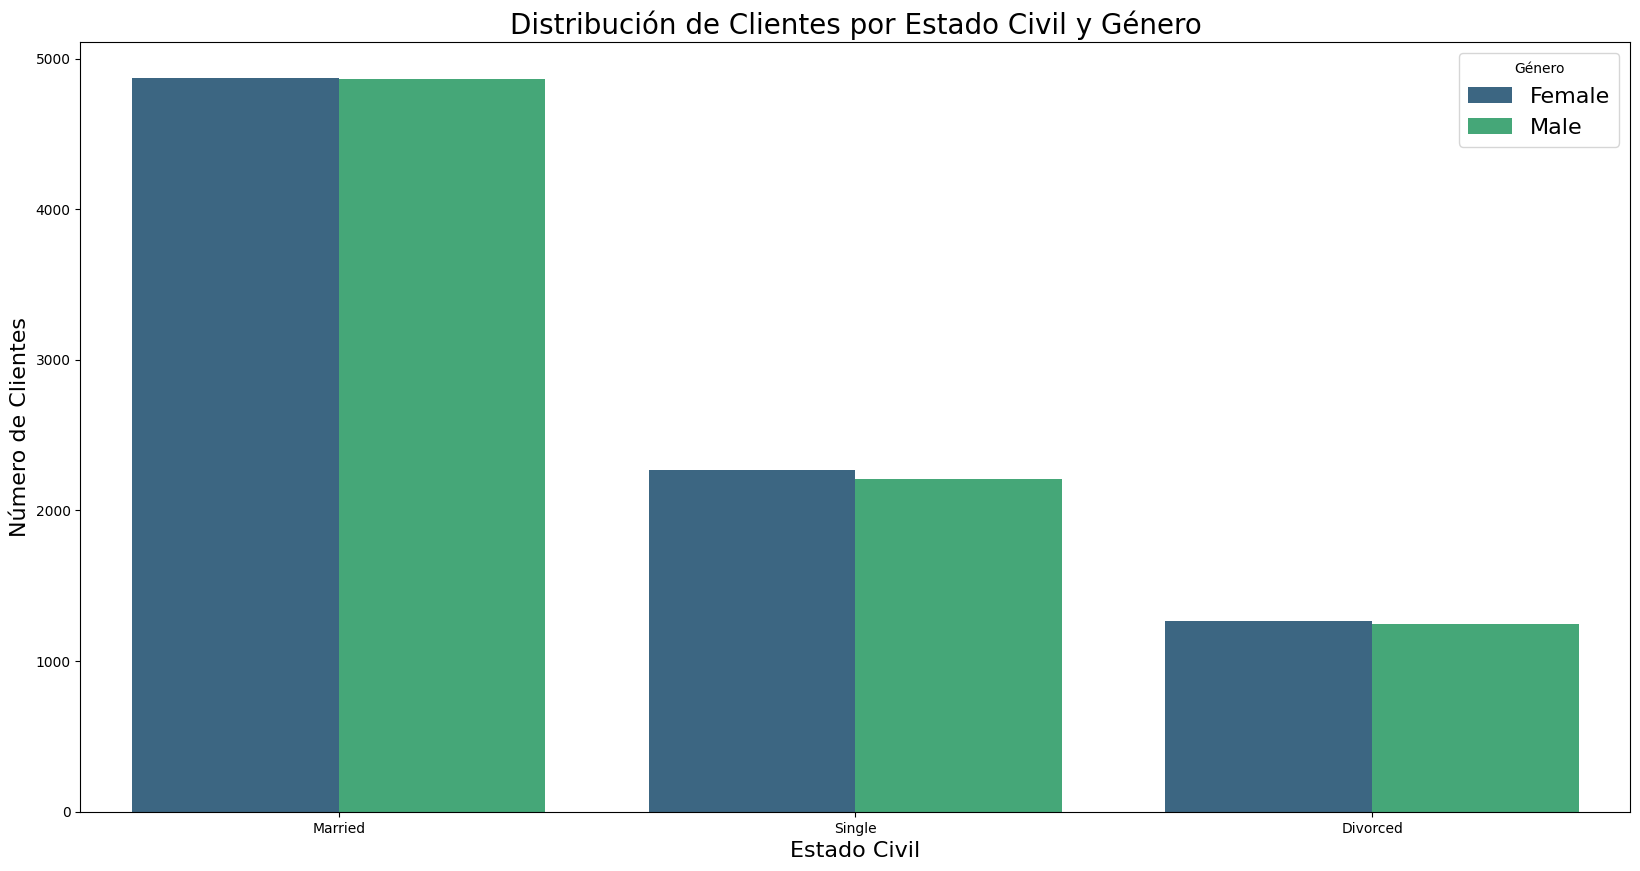

In [22]:
# Crear el gráfico de barras apiladas
plt.figure(figsize=(20, 10))
sns.countplot(x='estado_civil', 
              hue='genero', 
              data=df2, 
              palette='viridis',
              order = ["Married", "Single", "Divorced"])
plt.title('Distribución de Clientes por Estado Civil y Género', fontsize=20)
plt.xlabel('Estado Civil', fontsize=16)
plt.ylabel('Número de Clientes', fontsize=16)
plt.legend(title='Género', fontsize=16);

Utilizamos de nuevo el gráfico de barras agrupadas para visualizar la distribución de los clientes según su estado civil y género. Hay una proporción parecida entre nuestros clientes en función de su estado civil o género, destacando que el grupo más significativo son las personasz casadas (MARRIED) con practicamente igualdad entre hombres y mujeres. En el caso de los solteros (SINGLE) vemos una ligera predominancia de las mujeres y por último los clientes divorciados (DIVORCED) son el menos notables e igualmente presentan un reparto uniforme de los géneros. En resumen, MARRIED es el estado civil mas predominante y en todos los estados, la distribución de hombres y mujeres es muy pareja.
Esta información puede servirle a la empresa para personalizar estrategias de marketing o la  personalización de las ofertas.